In [1]:
# for now let's just compare pyfeat with libreface, but I'll expand this later

In [105]:
import numpy
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Sanity check 1 - 9697 trial 4

(failed 100% on aff4, 100% on aff5, BUT 0% on emotient)

both pyfeat and libreface detected the face

In [106]:
videoname = '9697_heat1_trial04'
path_to_folder = '/Users/zeleninam2/Documents/1_projects/1_FACE_PAIN/FER_installs/my_imgs/outputs/' + videoname +'/'
dat_imotions_emotient = pd.read_csv(path_to_folder + videoname + '_imotions_emotient.csv')
dat_pyfeat_xgb = pd.read_csv(path_to_folder + videoname + '_pyfeat_xgb.csv')
dat_pyfeat_svm = pd.read_csv(path_to_folder + videoname + '_pyfeat_svm.csv')
dat_libreface = pd.read_csv(path_to_folder + videoname + '_libreface.csv')

## iMotions file

that's a messy one

In [107]:
#dat_imotions_emotient.head(50)

In [108]:
data_starts = dat_imotions_emotient[dat_imotions_emotient['#INFO'] == '#DATA'].index[0]
mydat_imotions_emotient = dat_imotions_emotient.loc[data_starts+1:]
new_header = mydat_imotions_emotient.iloc[0] #grab the first row for the header
mydat_imotions_emotient = mydat_imotions_emotient[1:] #take the data less the header row
mydat_imotions_emotient.columns = new_header #set the header row as the df header
mydat_imotions_emotient = mydat_imotions_emotient.iloc[2:]
# there are also two random rows at the end we want to drop
mydat_imotions_emotient = mydat_imotions_emotient.iloc[:-2]
mydat_imotions_emotient

23,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource,SampleNumber,...,RIGHT_EYE_MEDIAL X,RIGHT_EYE_MEDIAL Y,RIGHT_EYE_PUPIL X,RIGHT_EYE_PUPIL Y,RIGHT_EYE_LATERAL X,RIGHT_EYE_LATERAL Y,NOSE_TIP X,NOSE_TIP Y,7 X,7 Y
26,3,33.3666,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1042.7530517578125,627.13079833984375,0,0,1179.013671875,637.296875,961.6749267578125,829.529052734375,0,0
27,4,50.0499,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1044.079833984375,625.140380859375,0,0,1180.81982421875,639.0062255859375,957.2431640625,830.67889404296875,0,0
28,5,66.7333,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1043.0672607421875,628.77392578125,0,0,1179.8333740234375,637.10968017578125,960.5235595703125,826.537841796875,0,0
29,6,83.4166,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1042.300048828125,623.03411865234375,0,0,1181.04833984375,640.68609619140625,956.8863525390625,832.271728515625,0,0
30,7,100.0999,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1046.92724609375,623.18572998046875,0,0,1179.3846435546875,638.6983642578125,963.11907958984375,816.515869140625,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,599,9976.6333,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1047.663818359375,617.38922119140625,0,0,1184.69970703125,628.698974609375,963.6258544921875,828.722412109375,0,0
623,600,9993.3166,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1046.8984375,615.81268310546875,0,0,1185.9754638671875,629.25628662109375,958.984130859375,831.175537109375,0,0
624,601,10009.9999,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1048.114990234375,617.82177734375,0,0,1190.1153564453125,629.48187255859375,962.861083984375,835.87567138671875,0,0
625,602,10026.6833,NaN,NaN,NaN,NaN,NaN,FaceRecording-1,1,NaN,...,1049.3209228515625,616.83489990234375,0,0,1185.50439453125,627.228759765625,961.11846923828125,834.422607421875,0,0


In [109]:
# only leave the relevant columns, just to make things easier

In [110]:
my_cols_imotions = []
for c in mydat_imotions_emotient.columns:
    if 'au' in c or "AU" in c:
        my_cols_imotions.append(c)

my_cols_imotions.extend(['Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive','Negative'])
print(my_cols_imotions)

['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU12', 'AU14', 'AU15', 'AU17', 'AU18', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive', 'Negative']


In [111]:
mydat_imotions_emotient = mydat_imotions_emotient[my_cols_imotions]
mydat_imotions_emotient

23,AU1,AU2,AU4,AU5,AU6,AU7,AU9,AU10,AU12,AU14,...,Surprise,Fear,Contempt,Disgust,Sadness,Confusion,Frustration,Neutral,Positive,Negative
26,-0.72715002298355103,-1.2831029891967773,-0.23285722732543945,-2.1143991947174072,0.2272878885269165,0.24637952446937561,-0.87159746885299683,0.16947807371616364,0.35324186086654663,-0.022913118824362755,...,-2.8257553577423096,-1.7255866527557373,-0.013568615540862083,0.53456765413284302,-0.16715008020401001,0.56005078554153442,0.32004281878471375,-0.71461665630340576,-0.47136160731315613,0.53456765413284302
27,-1.0779380798339844,-1.3111611604690552,-0.28912004828453064,-2.2839875221252441,0.44828680157661438,0.23214466869831085,-0.78333580493927002,0.19233588874340057,0.64488846063613892,0.09532880038022995,...,-2.9285199642181396,-2.0476646423339844,0.17268975079059601,0.5123828649520874,-0.38785424828529358,0.3194783627986908,0.37052944302558899,-0.79470294713973999,-0.055227663367986679,0.5123828649520874
28,-0.82540184259414673,-1.3251333236694336,-0.31121063232421875,-2.2012107372283936,0.19630472362041473,0.20764510333538055,-1.1170490980148315,0.20342688262462616,0.37586984038352966,0.044657815247774124,...,-3.0235052108764648,-1.6736587285995483,0.20891526341438293,0.45449647307395935,-0.12294998019933701,0.2051878422498703,0.1439279168844223,-0.91338187456130981,-0.40980824828147888,0.45449647307395935
29,-0.99544215202331543,-1.2549428939819336,-0.45960831642150879,-2.1513831615447998,0.25693708658218384,0.15176069736480713,-1.0655801296234131,0.1016714945435524,0.53516983985900879,0.11136036366224289,...,-2.6099989414215088,-1.8385034799575806,0.27546653151512146,0.44532620906829834,-0.35756024718284607,0.34820052981376648,0.3409695029258728,-0.76243007183074951,-0.31463190913200378,0.44532620906829834
30,-1.0890346765518188,-1.4960038661956787,-0.33392131328582764,-1.8169063329696655,0.39980915188789368,0.33600512146949768,-0.82014042139053345,0.030020926147699356,0.38191512227058411,0.050652012228965759,...,-3.4477980136871338,-1.889174222946167,0.4709867537021637,0.17116503417491913,-0.4007343053817749,0.12913393974304199,0.21698053181171417,-1.0985869169235229,-1.0492719411849976,0.4709867537021637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,-1.0786691904067993,-1.4424562454223633,0.38324695825576782,-1.283524751663208,0.7059396505355835,0.56393766403198242,-0.12823840975761414,0.20692725479602814,0.33127662539482117,0.081899076700210571,...,-2.9549961090087891,-1.7732739448547363,-0.19633443653583527,0.41225349903106689,-0.57701879739761353,0.89655202627182007,0.88258481025695801,-1.1710126399993896,-0.66420876979827881,0.80748927593231201
623,-1.2077192068099976,-1.5209366083145142,0.4193992018699646,-1.3143564462661743,0.66702306270599365,0.48839569091796875,-0.14062371850013733,0.27671316266059875,0.27437901496887207,-0.02627876028418541,...,-3.1414167881011963,-2.0797533988952637,-0.15009273588657379,0.43735432624816895,-0.69153958559036255,0.67932522296905518,0.6979718804359436,-1.4018039703369141,-0.77178364992141724,0.71329331398010254
624,-1.1690982580184937,-1.3993788957595825,0.27875089645385742,-1.4846417903900146,0.8864670991897583,0.64846855401992798,-0.22646176815032959,0.10595911741256714,0.57920771837234497,0.115665003657341,...,-2.9519720077514648,-2.1933481693267822,-0.067539997398853302,0.42009791731834412,-0.87683582305908203,0.62786346673965454,0.72421860694885254,-1.6402485370635986,-0.20304453372955322,0.62660127878189087
625,-1.0954370498657227,-1.4094721078872681,0.32760682702064514,-1.352213978767395,0.74397748708724976,0.59049159288406372,-0.17104451358318329,0.21703483164310455,0.29504796862602234,-0.036685671657323837,...,-2.8921246528625488,-2.1221778392791748,-0.38712027668952942,0.51211994886398315,-0.6063045859336853,0.80313032865524292,0.8632429838180542,-1.3812319040298462,-0.69763410091400146,0.81201279163360596


## pyfeat file

In [112]:
my_cols_pyfeat = []
for c in dat_pyfeat_xgb.columns:
    if 'au' in c or "AU" in c:
        my_cols_pyfeat.append(c)
my_cols_pyfeat.extend(['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'])
print(my_cols_pyfeat)

['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']


In [113]:
mydat_pyfeat_xgb = dat_pyfeat_xgb[my_cols_pyfeat]
mydat_pyfeat_svm = dat_pyfeat_svm[my_cols_pyfeat]

## libreface file

In [114]:
my_cols_libreface = []
for c in dat_libreface.columns:
    if 'au' in c or "AU" in c:
        my_cols_libreface.append(c)
my_cols_libreface.extend(['facial_expression'])
print(my_cols_libreface)

['au_1', 'au_2', 'au_4', 'au_6', 'au_7', 'au_10', 'au_12', 'au_14', 'au_15', 'au_17', 'au_23', 'au_24', 'au_1_intensity', 'au_2_intensity', 'au_4_intensity', 'au_5_intensity', 'au_6_intensity', 'au_9_intensity', 'au_12_intensity', 'au_15_intensity', 'au_17_intensity', 'au_20_intensity', 'au_25_intensity', 'au_26_intensity', 'facial_expression']


In [115]:
mydat_libreface = dat_libreface[my_cols_libreface]

## make all au columns readable

In [116]:
'''
iMotions: 

['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU12', 'AU14', 'AU15', 'AU17', 'AU18', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 
'AU28', 'AU43', 'Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive', 'Negative']

pyFeat:

['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 
'AU26', 'AU28', 'AU43', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

libreface:

['au_1', 'au_2', 'au_4', 'au_6', 'au_7', 'au_10', 'au_12', 'au_14', 'au_15', 'au_17', 'au_23', 'au_24', 
'au_1_intensity', 'au_2_intensity', 'au_4_intensity', 'au_5_intensity', 'au_6_intensity', 'au_9_intensity', 'au_12_intensity', 
'au_15_intensity', 'au_17_intensity', 'au_20_intensity', 'au_25_intensity', 'au_26_intensity', 'facial_expression']
'''

"\niMotions: \n\n['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU12', 'AU14', 'AU15', 'AU17', 'AU18', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', \n'AU28', 'AU43', 'Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive', 'Negative']\n\npyFeat:\n\n['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', \n'AU26', 'AU28', 'AU43', 'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']\n\nlibreface:\n\n['au_1', 'au_2', 'au_4', 'au_6', 'au_7', 'au_10', 'au_12', 'au_14', 'au_15', 'au_17', 'au_23', 'au_24', \n'au_1_intensity', 'au_2_intensity', 'au_4_intensity', 'au_5_intensity', 'au_6_intensity', 'au_9_intensity', 'au_12_intensity', \n'au_15_intensity', 'au_17_intensity', 'au_20_intensity', 'au_25_intensity', 'au_26_intensity', 'facial_expression']\n"

In [117]:
# imotions

dict_imotions = {}
for c in mydat_imotions_emotient.columns:
    dict_imotions[c] = 'imotions_' + c.lower()

dict_imotions['AU1'] = 'imotions_au01'
dict_imotions['AU2'] = 'imotions_au02'
dict_imotions['AU4'] = 'imotions_au04'
dict_imotions['AU5'] = 'imotions_au05'
dict_imotions['AU6'] = 'imotions_au06'
dict_imotions['AU7'] = 'imotions_au07'
dict_imotions['AU9'] = 'imotions_au09'

print(dict_imotions)

mydat_imotions_emotient = mydat_imotions_emotient.rename(columns=dict_imotions)
mydat_imotions_emotient.head(2)

{'AU1': 'imotions_au01', 'AU2': 'imotions_au02', 'AU4': 'imotions_au04', 'AU5': 'imotions_au05', 'AU6': 'imotions_au06', 'AU7': 'imotions_au07', 'AU9': 'imotions_au09', 'AU10': 'imotions_au10', 'AU12': 'imotions_au12', 'AU14': 'imotions_au14', 'AU15': 'imotions_au15', 'AU17': 'imotions_au17', 'AU18': 'imotions_au18', 'AU20': 'imotions_au20', 'AU23': 'imotions_au23', 'AU24': 'imotions_au24', 'AU25': 'imotions_au25', 'AU26': 'imotions_au26', 'AU28': 'imotions_au28', 'AU43': 'imotions_au43', 'Joy': 'imotions_joy', 'Anger': 'imotions_anger', 'Surprise': 'imotions_surprise', 'Fear': 'imotions_fear', 'Contempt': 'imotions_contempt', 'Disgust': 'imotions_disgust', 'Sadness': 'imotions_sadness', 'Confusion': 'imotions_confusion', 'Frustration': 'imotions_frustration', 'Neutral': 'imotions_neutral', 'Positive': 'imotions_positive', 'Negative': 'imotions_negative'}


23,imotions_au01,imotions_au02,imotions_au04,imotions_au05,imotions_au06,imotions_au07,imotions_au09,imotions_au10,imotions_au12,imotions_au14,...,imotions_surprise,imotions_fear,imotions_contempt,imotions_disgust,imotions_sadness,imotions_confusion,imotions_frustration,imotions_neutral,imotions_positive,imotions_negative
26,-0.72715002298355103,-1.2831029891967773,-0.23285722732543945,-2.1143991947174072,0.2272878885269165,0.24637952446937561,-0.87159746885299683,0.16947807371616364,0.35324186086654663,-0.022913118824362755,...,-2.8257553577423096,-1.7255866527557373,-0.013568615540862083,0.53456765413284302,-0.16715008020401001,0.56005078554153442,0.32004281878471375,-0.71461665630340576,-0.47136160731315613,0.53456765413284302
27,-1.0779380798339844,-1.3111611604690552,-0.28912004828453064,-2.2839875221252441,0.44828680157661438,0.23214466869831085,-0.78333580493927002,0.19233588874340057,0.64488846063613892,0.09532880038022995,...,-2.9285199642181396,-2.0476646423339844,0.17268975079059601,0.5123828649520874,-0.38785424828529358,0.3194783627986908,0.37052944302558899,-0.79470294713973999,-0.055227663367986679,0.5123828649520874


In [118]:
# pyfeat

dict_pf = {}
for c in mydat_pyfeat_xgb.columns:
    dict_pf[c] = 'pyfeat_' + c.lower()

print(dict_pf)

mydat_pyfeat_xgb = mydat_pyfeat_xgb.rename(columns=dict_pf)
mydat_pyfeat_xgb.head(2)

{'AU01': 'pyfeat_au01', 'AU02': 'pyfeat_au02', 'AU04': 'pyfeat_au04', 'AU05': 'pyfeat_au05', 'AU06': 'pyfeat_au06', 'AU07': 'pyfeat_au07', 'AU09': 'pyfeat_au09', 'AU10': 'pyfeat_au10', 'AU11': 'pyfeat_au11', 'AU12': 'pyfeat_au12', 'AU14': 'pyfeat_au14', 'AU15': 'pyfeat_au15', 'AU17': 'pyfeat_au17', 'AU20': 'pyfeat_au20', 'AU23': 'pyfeat_au23', 'AU24': 'pyfeat_au24', 'AU25': 'pyfeat_au25', 'AU26': 'pyfeat_au26', 'AU28': 'pyfeat_au28', 'AU43': 'pyfeat_au43', 'anger': 'pyfeat_anger', 'disgust': 'pyfeat_disgust', 'fear': 'pyfeat_fear', 'happiness': 'pyfeat_happiness', 'sadness': 'pyfeat_sadness', 'surprise': 'pyfeat_surprise', 'neutral': 'pyfeat_neutral'}


,pyfeat_au01,pyfeat_au02,pyfeat_au04,pyfeat_au05,pyfeat_au06,pyfeat_au07,pyfeat_au09,pyfeat_au10,pyfeat_au11,pyfeat_au12,...,pyfeat_au26,pyfeat_au28,pyfeat_au43,pyfeat_anger,pyfeat_disgust,pyfeat_fear,pyfeat_happiness,pyfeat_sadness,pyfeat_surprise,pyfeat_neutral
0,0.621565,0.516355,0.673706,0.235299,0.221653,0.0,0.781691,0.120460,1.0,0.142053,...,0.219121,0.642685,0.503665,0.106776,0.000404,0.001869,0.003272,0.863460,0.002733,0.021485
1,0.660811,0.430605,0.619632,0.227716,0.219964,0.0,0.765667,0.218401,1.0,0.150198,...,0.212873,0.587255,0.616684,0.088579,0.000399,0.002225,0.003920,0.885001,0.002801,0.017075


In [119]:
mydat_pyfeat_svm = mydat_pyfeat_svm.rename(columns=dict_pf)
mydat_pyfeat_svm.head(2)

,pyfeat_au01,pyfeat_au02,pyfeat_au04,pyfeat_au05,pyfeat_au06,pyfeat_au07,pyfeat_au09,pyfeat_au10,pyfeat_au11,pyfeat_au12,...,pyfeat_au26,pyfeat_au28,pyfeat_au43,pyfeat_anger,pyfeat_disgust,pyfeat_fear,pyfeat_happiness,pyfeat_sadness,pyfeat_surprise,pyfeat_neutral
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.106776,0.000404,0.001869,0.003272,0.863460,0.002733,0.021485
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.088579,0.000399,0.002225,0.003920,0.885001,0.002801,0.017075


In [120]:
# libreface

'''
['au_1', 'au_2', 'au_4', 'au_6', 'au_7', 'au_10', 'au_12', 'au_14', 'au_15', 'au_17', 'au_23', 'au_24', 
'au_1_intensity', 'au_2_intensity', 'au_4_intensity', 'au_5_intensity', 'au_6_intensity', 'au_9_intensity', 'au_12_intensity', 
'au_15_intensity', 'au_17_intensity', 'au_20_intensity', 'au_25_intensity', 'au_26_intensity', 'facial_expression']
'''

"\n['au_1', 'au_2', 'au_4', 'au_6', 'au_7', 'au_10', 'au_12', 'au_14', 'au_15', 'au_17', 'au_23', 'au_24', \n'au_1_intensity', 'au_2_intensity', 'au_4_intensity', 'au_5_intensity', 'au_6_intensity', 'au_9_intensity', 'au_12_intensity', \n'au_15_intensity', 'au_17_intensity', 'au_20_intensity', 'au_25_intensity', 'au_26_intensity', 'facial_expression']\n"

In [121]:
dict_lf = {}
for c in mydat_libreface.columns:
    if 'au' in c:
        dict_lf[c] = 'libreface_au' + c.lower()[3:]

print(dict_lf)

{'au_1': 'libreface_au1', 'au_2': 'libreface_au2', 'au_4': 'libreface_au4', 'au_6': 'libreface_au6', 'au_7': 'libreface_au7', 'au_10': 'libreface_au10', 'au_12': 'libreface_au12', 'au_14': 'libreface_au14', 'au_15': 'libreface_au15', 'au_17': 'libreface_au17', 'au_23': 'libreface_au23', 'au_24': 'libreface_au24', 'au_1_intensity': 'libreface_au1_intensity', 'au_2_intensity': 'libreface_au2_intensity', 'au_4_intensity': 'libreface_au4_intensity', 'au_5_intensity': 'libreface_au5_intensity', 'au_6_intensity': 'libreface_au6_intensity', 'au_9_intensity': 'libreface_au9_intensity', 'au_12_intensity': 'libreface_au12_intensity', 'au_15_intensity': 'libreface_au15_intensity', 'au_17_intensity': 'libreface_au17_intensity', 'au_20_intensity': 'libreface_au20_intensity', 'au_25_intensity': 'libreface_au25_intensity', 'au_26_intensity': 'libreface_au26_intensity'}


In [122]:
dict_lf['au_1'] = 'libreface_au01'
dict_lf['au_1_intensity'] = 'libreface_au01_intensity'
dict_lf['au_2'] = 'libreface_au02'
dict_lf['au_2_intensity'] = 'libreface_au02_intensity'
dict_lf['au_4'] = 'libreface_au04'
dict_lf['au_4_intensity'] = 'libreface_au04_intensity'
dict_lf['au_6'] = 'libreface_au06'
dict_lf['au_6_intensity'] = 'libreface_au06_intensity'
dict_lf['au_7'] = 'libreface_au07'
dict_lf['au_7_intensity'] = 'libreface_au07_intensity'
print(dict_lf)

{'au_1': 'libreface_au01', 'au_2': 'libreface_au02', 'au_4': 'libreface_au04', 'au_6': 'libreface_au06', 'au_7': 'libreface_au07', 'au_10': 'libreface_au10', 'au_12': 'libreface_au12', 'au_14': 'libreface_au14', 'au_15': 'libreface_au15', 'au_17': 'libreface_au17', 'au_23': 'libreface_au23', 'au_24': 'libreface_au24', 'au_1_intensity': 'libreface_au01_intensity', 'au_2_intensity': 'libreface_au02_intensity', 'au_4_intensity': 'libreface_au04_intensity', 'au_5_intensity': 'libreface_au5_intensity', 'au_6_intensity': 'libreface_au06_intensity', 'au_9_intensity': 'libreface_au9_intensity', 'au_12_intensity': 'libreface_au12_intensity', 'au_15_intensity': 'libreface_au15_intensity', 'au_17_intensity': 'libreface_au17_intensity', 'au_20_intensity': 'libreface_au20_intensity', 'au_25_intensity': 'libreface_au25_intensity', 'au_26_intensity': 'libreface_au26_intensity', 'au_7_intensity': 'libreface_au07_intensity'}


In [123]:
mydat_libreface = mydat_libreface.rename(columns=dict_lf)
mydat_libreface.head(2)

,libreface_au01,libreface_au02,libreface_au04,libreface_au06,libreface_au07,libreface_au10,libreface_au12,libreface_au14,libreface_au15,libreface_au17,...,libreface_au5_intensity,libreface_au06_intensity,libreface_au9_intensity,libreface_au12_intensity,libreface_au15_intensity,libreface_au17_intensity,libreface_au20_intensity,libreface_au25_intensity,libreface_au26_intensity,facial_expression
0,0,0,1,1,1,1,1,1,0,0,...,0.047985,0.163758,0.055708,0.391794,0.032859,0.128756,0.064346,0.119284,0.053935,Anger
1,0,0,1,1,1,1,1,1,0,0,...,0.048411,0.169289,0.057017,0.407915,0.033227,0.135245,0.067663,0.110596,0.056029,Anger


# Analysis

In [124]:
# let's for now only compare pspi AUs

## check if they are all on the same scale

In [125]:
mydat_imotions_emotient.head(2)

23,imotions_au01,imotions_au02,imotions_au04,imotions_au05,imotions_au06,imotions_au07,imotions_au09,imotions_au10,imotions_au12,imotions_au14,...,imotions_surprise,imotions_fear,imotions_contempt,imotions_disgust,imotions_sadness,imotions_confusion,imotions_frustration,imotions_neutral,imotions_positive,imotions_negative
26,-0.72715002298355103,-1.2831029891967773,-0.23285722732543945,-2.1143991947174072,0.2272878885269165,0.24637952446937561,-0.87159746885299683,0.16947807371616364,0.35324186086654663,-0.022913118824362755,...,-2.8257553577423096,-1.7255866527557373,-0.013568615540862083,0.53456765413284302,-0.16715008020401001,0.56005078554153442,0.32004281878471375,-0.71461665630340576,-0.47136160731315613,0.53456765413284302
27,-1.0779380798339844,-1.3111611604690552,-0.28912004828453064,-2.2839875221252441,0.44828680157661438,0.23214466869831085,-0.78333580493927002,0.19233588874340057,0.64488846063613892,0.09532880038022995,...,-2.9285199642181396,-2.0476646423339844,0.17268975079059601,0.5123828649520874,-0.38785424828529358,0.3194783627986908,0.37052944302558899,-0.79470294713973999,-0.055227663367986679,0.5123828649520874


In [126]:
mydat_pyfeat_xgb.head(2)

,pyfeat_au01,pyfeat_au02,pyfeat_au04,pyfeat_au05,pyfeat_au06,pyfeat_au07,pyfeat_au09,pyfeat_au10,pyfeat_au11,pyfeat_au12,...,pyfeat_au26,pyfeat_au28,pyfeat_au43,pyfeat_anger,pyfeat_disgust,pyfeat_fear,pyfeat_happiness,pyfeat_sadness,pyfeat_surprise,pyfeat_neutral
0,0.621565,0.516355,0.673706,0.235299,0.221653,0.0,0.781691,0.120460,1.0,0.142053,...,0.219121,0.642685,0.503665,0.106776,0.000404,0.001869,0.003272,0.863460,0.002733,0.021485
1,0.660811,0.430605,0.619632,0.227716,0.219964,0.0,0.765667,0.218401,1.0,0.150198,...,0.212873,0.587255,0.616684,0.088579,0.000399,0.002225,0.003920,0.885001,0.002801,0.017075


In [127]:
mydat_pyfeat_svm.head(2)

,pyfeat_au01,pyfeat_au02,pyfeat_au04,pyfeat_au05,pyfeat_au06,pyfeat_au07,pyfeat_au09,pyfeat_au10,pyfeat_au11,pyfeat_au12,...,pyfeat_au26,pyfeat_au28,pyfeat_au43,pyfeat_anger,pyfeat_disgust,pyfeat_fear,pyfeat_happiness,pyfeat_sadness,pyfeat_surprise,pyfeat_neutral
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.106776,0.000404,0.001869,0.003272,0.863460,0.002733,0.021485
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.088579,0.000399,0.002225,0.003920,0.885001,0.002801,0.017075


In [128]:
mydat_libreface.head(2)

,libreface_au01,libreface_au02,libreface_au04,libreface_au06,libreface_au07,libreface_au10,libreface_au12,libreface_au14,libreface_au15,libreface_au17,...,libreface_au5_intensity,libreface_au06_intensity,libreface_au9_intensity,libreface_au12_intensity,libreface_au15_intensity,libreface_au17_intensity,libreface_au20_intensity,libreface_au25_intensity,libreface_au26_intensity,facial_expression
0,0,0,1,1,1,1,1,1,0,0,...,0.047985,0.163758,0.055708,0.391794,0.032859,0.128756,0.064346,0.119284,0.053935,Anger
1,0,0,1,1,1,1,1,1,0,0,...,0.048411,0.169289,0.057017,0.407915,0.033227,0.135245,0.067663,0.110596,0.056029,Anger


## do they even output the same emotion?

In [129]:
'''
iMotions: 

'Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive', 'Negative']

pyFeat:

'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

libreface:

'facial_expression']
'''

"\niMotions: \n\n'Joy', 'Anger', 'Surprise', 'Fear', 'Contempt', 'Disgust', 'Sadness', 'Confusion', 'Frustration', 'Neutral', 'Positive', 'Negative']\n\npyFeat:\n\n'anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']\n\nlibreface:\n\n'facial_expression']\n"

facial_expression
Anger      235
Neutral      7
Name: count, dtype: int64

### imotions

In [132]:
mydat_imotions_emotient.head(2)

23,imotions_au01,imotions_au02,imotions_au04,imotions_au05,imotions_au06,imotions_au07,imotions_au09,imotions_au10,imotions_au12,imotions_au14,...,imotions_surprise,imotions_fear,imotions_contempt,imotions_disgust,imotions_sadness,imotions_confusion,imotions_frustration,imotions_neutral,imotions_positive,imotions_negative
26,-0.72715002298355103,-1.2831029891967773,-0.23285722732543945,-2.1143991947174072,0.2272878885269165,0.24637952446937561,-0.87159746885299683,0.16947807371616364,0.35324186086654663,-0.022913118824362755,...,-2.8257553577423096,-1.7255866527557373,-0.013568615540862083,0.53456765413284302,-0.16715008020401001,0.56005078554153442,0.32004281878471375,-0.71461665630340576,-0.47136160731315613,0.53456765413284302
27,-1.0779380798339844,-1.3111611604690552,-0.28912004828453064,-2.2839875221252441,0.44828680157661438,0.23214466869831085,-0.78333580493927002,0.19233588874340057,0.64488846063613892,0.09532880038022995,...,-2.9285199642181396,-2.0476646423339844,0.17268975079059601,0.5123828649520874,-0.38785424828529358,0.3194783627986908,0.37052944302558899,-0.79470294713973999,-0.055227663367986679,0.5123828649520874


In [134]:
imotions_list_emotions = ['imotions_joy', 'imotions_anger', 'imotions_surprise', 'imotions_fear', 'imotions_contempt',
                         'imotions_disgust', 'imotions_sadness', 'imotions_confusion', 'imotions_frustration']
imotions_list_valence = ['imotions_neutral', 'imotions_positive', 'imotions_negative']

mydat_imotions_emotient['max_emotion'] = mydat_imotions_emotient[imotions_list_emotions].idxmax(axis=1)
mydat_imotions_emotient['max_valence'] = mydat_imotions_emotient[imotions_list_valence].idxmax(axis=1)

mydat_imotions_emotient.head(2)

23,imotions_au01,imotions_au02,imotions_au04,imotions_au05,imotions_au06,imotions_au07,imotions_au09,imotions_au10,imotions_au12,imotions_au14,...,imotions_contempt,imotions_disgust,imotions_sadness,imotions_confusion,imotions_frustration,imotions_neutral,imotions_positive,imotions_negative,max_emotion,max_valence
26,-0.72715002298355103,-1.2831029891967773,-0.23285722732543945,-2.1143991947174072,0.2272878885269165,0.24637952446937561,-0.87159746885299683,0.16947807371616364,0.35324186086654663,-0.022913118824362755,...,-0.013568615540862083,0.53456765413284302,-0.16715008020401001,0.56005078554153442,0.32004281878471375,-0.71461665630340576,-0.47136160731315613,0.53456765413284302,imotions_confusion,imotions_negative
27,-1.0779380798339844,-1.3111611604690552,-0.28912004828453064,-2.2839875221252441,0.44828680157661438,0.23214466869831085,-0.78333580493927002,0.19233588874340057,0.64488846063613892,0.09532880038022995,...,0.17268975079059601,0.5123828649520874,-0.38785424828529358,0.3194783627986908,0.37052944302558899,-0.79470294713973999,-0.055227663367986679,0.5123828649520874,imotions_disgust,imotions_negative


In [135]:
mydat_imotions_emotient.max_emotion.value_counts()

max_emotion
imotions_frustration    223
imotions_disgust        182
imotions_confusion      121
imotions_contempt        63
imotions_anger            8
imotions_sadness          4
Name: count, dtype: int64

### pyfeat

In [136]:
mydat_pyfeat_xgb.head(2)

,pyfeat_au01,pyfeat_au02,pyfeat_au04,pyfeat_au05,pyfeat_au06,pyfeat_au07,pyfeat_au09,pyfeat_au10,pyfeat_au11,pyfeat_au12,...,pyfeat_au26,pyfeat_au28,pyfeat_au43,pyfeat_anger,pyfeat_disgust,pyfeat_fear,pyfeat_happiness,pyfeat_sadness,pyfeat_surprise,pyfeat_neutral
0,0.621565,0.516355,0.673706,0.235299,0.221653,0.0,0.781691,0.120460,1.0,0.142053,...,0.219121,0.642685,0.503665,0.106776,0.000404,0.001869,0.003272,0.863460,0.002733,0.021485
1,0.660811,0.430605,0.619632,0.227716,0.219964,0.0,0.765667,0.218401,1.0,0.150198,...,0.212873,0.587255,0.616684,0.088579,0.000399,0.002225,0.003920,0.885001,0.002801,0.017075


In [139]:
pyfeat_list_emotions = ['pyfeat_anger', 'pyfeat_disgust', 'pyfeat_fear', 'pyfeat_happiness', 'pyfeat_sadness', 'pyfeat_surprise', 'pyfeat_neutral']
mydat_pyfeat_xgb['max_emotion'] = mydat_pyfeat_xgb[pyfeat_list_emotions].idxmax(axis=1)
mydat_pyfeat_svm['max_emotion'] = mydat_pyfeat_svm[pyfeat_list_emotions].idxmax(axis=1)


In [140]:
mydat_pyfeat_xgb.max_emotion.value_counts()

max_emotion
pyfeat_sadness    601
Name: count, dtype: int64

In [141]:
mydat_pyfeat_svm.max_emotion.value_counts()

max_emotion
pyfeat_sadness    601
Name: count, dtype: int64

### libreface

In [142]:
mydat_libreface.facial_expression.value_counts()

facial_expression
Anger      235
Neutral      7
Name: count, dtype: int64

In [ ]:
mydict_emotions = {}

In [ ]:
# DONT RUN THIS

mydict = {}

for i in [4, 6, 9, 1, 2, 5]:
    au = str(i)
    mydict['AU_'+au] = {'av_pf': dat_pyfeat['AU0'+au].mean(), 'av_lf': dat_libreface['au_'+au+'_intensity'].mean()}
    
for i in [12, 17, 20, 25, 26, 15]:
    au = str(i)
    mydict['AU_'+au] = {'av_pf': dat_pyfeat['AU'+au].mean(), 'av_lf': dat_libreface['au_'+au+'_intensity'].mean()}

mydict

df_au_means = pd.DataFrame.from_dict(mydict, orient='index')
print(df_au_means)

df_au_means_reset = df_au_means.reset_index()
df_au_means_reset

df_melted = df_au_means_reset[['AU','av_pf','av_lf']].melt(id_vars='AU', var_name='FER_software', value_name='AU_intensity')
df_melted

In [131]:
# count the average emotion
df_emotions = 

SyntaxError: invalid syntax (451279398.py, line 2)

# putting it into a function

In [ ]:
def run_fer_comparison(path_to_outputs, videoname, do_aff4, do_aff5, do_emo, do_pyfeat_svm, do_pyfeat_xgb, do_libreface):
    return(0)

# continuous experiments

In [ ]:
dat_pyfeat = pd.read_csv('/Users/zeleninam2/Documents/1_projects/1_FACE_PAIN/FER_installs/my_imgs/outputs/pyfeat/OUTPUT_pyfeat_9697_GOPR1502_heat1_combined_trial4.csv')
dat_libreface = pd.read_csv('/Users/zeleninam2/Documents/1_projects/1_FACE_PAIN/FER_installs/my_imgs/outputs/libreface/OUTPUT_9697_GOPR1502_heat1_combined_trial4.csv')

In [3]:
dat_pyfeat.head()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,x_4,...,Identity_506,Identity_507,Identity_508,Identity_509,Identity_510,Identity_511,Identity_512,input,frame,approx_time
0,692.837920,319.118099,559.324979,759.726584,0.999457,702.118327,695.971047,698.167410,707.042716,728.187137,...,0.043125,0.028455,-0.037332,-0.005057,0.063511,-0.038445,0.015125,/Users/zeleninam2/Documents/1_projects/1_FACE_...,0,00:00
1,693.861224,318.987854,560.021171,761.296649,0.999425,702.800850,697.884812,700.880580,709.957677,730.930070,...,0.044438,0.029976,-0.039910,-0.006558,0.060536,-0.036065,0.015203,/Users/zeleninam2/Documents/1_projects/1_FACE_...,1,00:00
2,693.347448,317.701659,560.184280,762.384715,0.999418,703.507336,697.007114,698.898501,707.505612,728.419341,...,0.043776,0.029008,-0.037698,-0.004407,0.062435,-0.037248,0.016005,/Users/zeleninam2/Documents/1_projects/1_FACE_...,2,00:00
3,693.995110,318.417222,559.273766,761.700168,0.999395,703.176475,696.594729,698.348188,706.787220,727.579814,...,0.043701,0.029445,-0.037854,-0.004750,0.062231,-0.037178,0.016569,/Users/zeleninam2/Documents/1_projects/1_FACE_...,3,00:00
4,692.632022,317.783195,561.619230,762.697276,0.999464,703.101344,696.556806,698.342823,706.738636,727.523276,...,0.044091,0.029794,-0.037553,-0.004576,0.062045,-0.037207,0.015839,/Users/zeleninam2/Documents/1_projects/1_FACE_...,4,00:00


In [4]:
dat_libreface.head()

,frame_idx,frame_time_in_ms,pitch,yaw,roll,lm_mp_0_x,lm_mp_0_y,lm_mp_0_z,lm_mp_1_x,lm_mp_1_y,...,au_5_intensity,au_6_intensity,au_9_intensity,au_12_intensity,au_15_intensity,au_17_intensity,au_20_intensity,au_25_intensity,au_26_intensity,facial_expression
0,0,0.000000,-1.922103,0.186642,0.010226,0.492680,0.832778,-0.010060,0.497830,0.783018,...,0.047985,0.163758,0.055708,0.391794,0.032859,0.128756,0.064346,0.119284,0.053935,Anger
1,1,0.016683,-2.007241,0.286039,0.013680,0.492900,0.834701,-0.009750,0.498773,0.782580,...,0.048411,0.169289,0.057017,0.407915,0.033227,0.135245,0.067663,0.110596,0.056029,Anger
2,2,0.033367,-2.095401,0.290474,0.007116,0.496418,0.835767,-0.009495,0.499279,0.782055,...,0.050215,0.174978,0.058388,0.394235,0.034601,0.144266,0.069081,0.108180,0.055653,Anger
3,3,0.050050,-2.007891,0.302789,0.009221,0.495666,0.834825,-0.009706,0.499814,0.782304,...,0.048838,0.172884,0.056528,0.408677,0.033209,0.138749,0.067737,0.104831,0.055470,Anger
4,4,0.066733,-1.988735,0.304477,0.003571,0.497149,0.835530,-0.010170,0.500351,0.779822,...,0.047747,0.159030,0.054731,0.365597,0.033150,0.141172,0.067478,0.099077,0.052865,Anger


In [5]:
dat_pyfeat.shape

(601, 687)

In [6]:
dat_libreface.shape

(242, 1464)

In [7]:
# so they output a different number of frames.
# we can just calculate the average value for each AU present and compare them?
# the AUs that are present (and predicted with intensity, not just present/not present) in both are:
# 4, 6, 9, 1, 2, 5, 12, 17, 20, 25, 26, 15

In [8]:
# how are the columns named?

In [37]:
#for col in dat_pyfeat.columns:
#    print(col)

In [39]:
for col in dat_libreface.columns:
   print(col)

frame_idx
frame_time_in_ms
pitch
yaw
roll
lm_mp_0_x
lm_mp_0_y
lm_mp_0_z
lm_mp_1_x
lm_mp_1_y
lm_mp_1_z
lm_mp_2_x
lm_mp_2_y
lm_mp_2_z
lm_mp_3_x
lm_mp_3_y
lm_mp_3_z
lm_mp_4_x
lm_mp_4_y
lm_mp_4_z
lm_mp_5_x
lm_mp_5_y
lm_mp_5_z
lm_mp_6_x
lm_mp_6_y
lm_mp_6_z
lm_mp_7_x
lm_mp_7_y
lm_mp_7_z
lm_mp_8_x
lm_mp_8_y
lm_mp_8_z
lm_mp_9_x
lm_mp_9_y
lm_mp_9_z
lm_mp_10_x
lm_mp_10_y
lm_mp_10_z
lm_mp_11_x
lm_mp_11_y
lm_mp_11_z
lm_mp_12_x
lm_mp_12_y
lm_mp_12_z
lm_mp_13_x
lm_mp_13_y
lm_mp_13_z
lm_mp_14_x
lm_mp_14_y
lm_mp_14_z
lm_mp_15_x
lm_mp_15_y
lm_mp_15_z
lm_mp_16_x
lm_mp_16_y
lm_mp_16_z
lm_mp_17_x
lm_mp_17_y
lm_mp_17_z
lm_mp_18_x
lm_mp_18_y
lm_mp_18_z
lm_mp_19_x
lm_mp_19_y
lm_mp_19_z
lm_mp_20_x
lm_mp_20_y
lm_mp_20_z
lm_mp_21_x
lm_mp_21_y
lm_mp_21_z
lm_mp_22_x
lm_mp_22_y
lm_mp_22_z
lm_mp_23_x
lm_mp_23_y
lm_mp_23_z
lm_mp_24_x
lm_mp_24_y
lm_mp_24_z
lm_mp_25_x
lm_mp_25_y
lm_mp_25_z
lm_mp_26_x
lm_mp_26_y
lm_mp_26_z
lm_mp_27_x
lm_mp_27_y
lm_mp_27_z
lm_mp_28_x
lm_mp_28_y
lm_mp_28_z
lm_mp_29_x
lm_mp_29_y
lm_mp_29_

In [11]:
# are they on the same scale?

In [12]:
print(dat_pyfeat.AU04.min())
print(dat_pyfeat.AU04.max())

0.40337244
0.91775006


In [13]:
print(dat_libreface.au_4_intensity.min())
print(dat_libreface.au_4_intensity.max())

0.5182682871818542
1.120989203453064


In [14]:
#no???? I think libreface is 0 to 5???
# libreface paper: 
# The intensity estimation is usually represented on a scale of from 0 to 5, with the bigger value indicating stronger strength of the AU activation. 

In [15]:
print(dat_pyfeat.AU01.min())
print(dat_pyfeat.AU01.max())
print(dat_libreface.au_1_intensity.min())
print(dat_libreface.au_1_intensity.max())

0.29932782
0.69881135
0.0680888071656227
0.1085040271282196


In [16]:
def normalize_feature(value):
  if not 0 <= value <= 5:
    raise ValueError("Value must be within the range [0, 5]")  
  return value / 5

In [17]:
# 4, 6, 9, 1, 2, 5, 12, 17, 20, 25, 26, 15
dat_libreface['au_4_intensity'] = dat_libreface['au_4_intensity'].apply(normalize_feature)
dat_libreface['au_6_intensity'] = dat_libreface['au_6_intensity'].apply(normalize_feature)
dat_libreface['au_9_intensity'] = dat_libreface['au_9_intensity'].apply(normalize_feature)
dat_libreface['au_1_intensity'] = dat_libreface['au_1_intensity'].apply(normalize_feature)
dat_libreface['au_2_intensity'] = dat_libreface['au_2_intensity'].apply(normalize_feature)
dat_libreface['au_5_intensity'] = dat_libreface['au_5_intensity'].apply(normalize_feature)
dat_libreface['au_12_intensity'] = dat_libreface['au_12_intensity'].apply(normalize_feature)
dat_libreface['au_17_intensity'] = dat_libreface['au_17_intensity'].apply(normalize_feature)
dat_libreface['au_20_intensity'] = dat_libreface['au_20_intensity'].apply(normalize_feature)
dat_libreface['au_25_intensity'] = dat_libreface['au_25_intensity'].apply(normalize_feature)
dat_libreface['au_26_intensity'] = dat_libreface['au_26_intensity'].apply(normalize_feature)
dat_libreface['au_15_intensity'] = dat_libreface['au_15_intensity'].apply(normalize_feature)

In [18]:
mydict = {
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
    'AU4': {'av_pf': dat_pyfeat['AU04'].mean(), 'av_lf': dat_libreface['au_4_intensity'].mean()},
}

In [19]:
mydict = {}

for i in [4, 6, 9, 1, 2, 5]:
    au = str(i)
    mydict['AU_'+au] = {'av_pf': dat_pyfeat['AU0'+au].mean(), 'av_lf': dat_libreface['au_'+au+'_intensity'].mean()}
    
for i in [12, 17, 20, 25, 26, 15]:
    au = str(i)
    mydict['AU_'+au] = {'av_pf': dat_pyfeat['AU'+au].mean(), 'av_lf': dat_libreface['au_'+au+'_intensity'].mean()}

mydict

{'AU_4': {'av_pf': np.float64(0.6732391453244593),
  'av_lf': np.float64(0.14905970574410493)},
 'AU_6': {'av_pf': np.float64(0.272236420765391),
  'av_lf': np.float64(0.03415055829754545)},
 'AU_9': {'av_pf': np.float64(0.7516329446921798),
  'av_lf': np.float64(0.011896879155158004)},
 'AU_1': {'av_pf': np.float64(0.6000304478202995),
  'av_lf': np.float64(0.017872979442689035)},
 'AU_2': {'av_pf': np.float64(0.47279988389351074),
  'av_lf': np.float64(0.013164243191357478)},
 'AU_5': {'av_pf': np.float64(0.23416257973377705),
  'av_lf': np.float64(0.01020054194368113)},
 'AU_12': {'av_pf': np.float64(0.1031530491780366),
  'av_lf': np.float64(0.08154708053454882)},
 'AU_17': {'av_pf': np.float64(0.4617557924126456),
  'av_lf': np.float64(0.027112776034873373)},
 'AU_20': {'av_pf': np.float64(1.0),
  'av_lf': np.float64(0.013483809839841739)},
 'AU_25': {'av_pf': np.float64(0.300039330640599),
  'av_lf': np.float64(0.02364376604803337)},
 'AU_26': {'av_pf': np.float64(0.4683306689517

In [20]:
df_au_means = pd.DataFrame.from_dict(mydict, orient='index')
print(df_au_means)

          av_pf     av_lf
AU_4   0.673239  0.149060
AU_6   0.272236  0.034151
AU_9   0.751633  0.011897
AU_1   0.600030  0.017873
AU_2   0.472800  0.013164
AU_5   0.234163  0.010201
AU_12  0.103153  0.081547
AU_17  0.461756  0.027113
AU_20  1.000000  0.013484
AU_25  0.300039  0.023644
AU_26  0.468331  0.011550
AU_15  0.651496  0.006885


In [21]:
df_au_means_reset = df_au_means.reset_index()
df_au_means_reset

,index,av_pf,av_lf
0,AU_4,0.673239,0.149060
1,AU_6,0.272236,0.034151
2,AU_9,0.751633,0.011897
3,AU_1,0.600030,0.017873
4,AU_2,0.472800,0.013164
5,AU_5,0.234163,0.010201
6,AU_12,0.103153,0.081547
7,AU_17,0.461756,0.027113
8,AU_20,1.000000,0.013484
9,AU_25,0.300039,0.023644


In [24]:
# REALLY NOT A GOOD WAY of doing this, but my df is small and I can double-check by hand
df_au_means_reset['meaning'] = ['brow_lowerer',
                                'cheek_raiser',
                                'nose_wrinkler',
                                'inner_brow_raiser',
                                'outer_brow_raiser',
                                'upper_lid_raiser',
                                'lip_corner_puller',
                                'chin_raiser',
                                'lip_stretcher',
                                'lips_parter',
                                'jaw_dropper',
                                'lip_corner_depressor']
df_au_means_reset

,index,av_pf,av_lf,meaning
0,AU_4,0.673239,0.149060,brow_lowerer
1,AU_6,0.272236,0.034151,cheek_raiser
2,AU_9,0.751633,0.011897,nose_wrinkler
3,AU_1,0.600030,0.017873,inner_brow_raiser
4,AU_2,0.472800,0.013164,outer_brow_raiser
5,AU_5,0.234163,0.010201,upper_lid_raiser
6,AU_12,0.103153,0.081547,lip_corner_puller
7,AU_17,0.461756,0.027113,chin_raiser
8,AU_20,1.000000,0.013484,lip_stretcher
9,AU_25,0.300039,0.023644,lips_parter


In [25]:
df_au_means_reset['AU'] = df_au_means_reset['index']+'_'+df_au_means_reset['meaning']
df_au_means_reset

,index,av_pf,av_lf,meaning,AU
0,AU_4,0.673239,0.149060,brow_lowerer,AU_4_brow_lowerer
1,AU_6,0.272236,0.034151,cheek_raiser,AU_6_cheek_raiser
2,AU_9,0.751633,0.011897,nose_wrinkler,AU_9_nose_wrinkler
3,AU_1,0.600030,0.017873,inner_brow_raiser,AU_1_inner_brow_raiser
4,AU_2,0.472800,0.013164,outer_brow_raiser,AU_2_outer_brow_raiser
5,AU_5,0.234163,0.010201,upper_lid_raiser,AU_5_upper_lid_raiser
6,AU_12,0.103153,0.081547,lip_corner_puller,AU_12_lip_corner_puller
7,AU_17,0.461756,0.027113,chin_raiser,AU_17_chin_raiser
8,AU_20,1.000000,0.013484,lip_stretcher,AU_20_lip_stretcher
9,AU_25,0.300039,0.023644,lips_parter,AU_25_lips_parter


In [35]:
df_melted = df_au_means_reset[['AU','av_pf','av_lf']].melt(id_vars='AU', var_name='FER_software', value_name='AU_intensity')
df_melted

,AU,FER_software,AU_intensity
0,AU_4_brow_lowerer,av_pf,0.673239
1,AU_6_cheek_raiser,av_pf,0.272236
2,AU_9_nose_wrinkler,av_pf,0.751633
3,AU_1_inner_brow_raiser,av_pf,0.600030
4,AU_2_outer_brow_raiser,av_pf,0.472800
5,AU_5_upper_lid_raiser,av_pf,0.234163
6,AU_12_lip_corner_puller,av_pf,0.103153
7,AU_17_chin_raiser,av_pf,0.461756
8,AU_20_lip_stretcher,av_pf,1.000000
9,AU_25_lips_parter,av_pf,0.300039


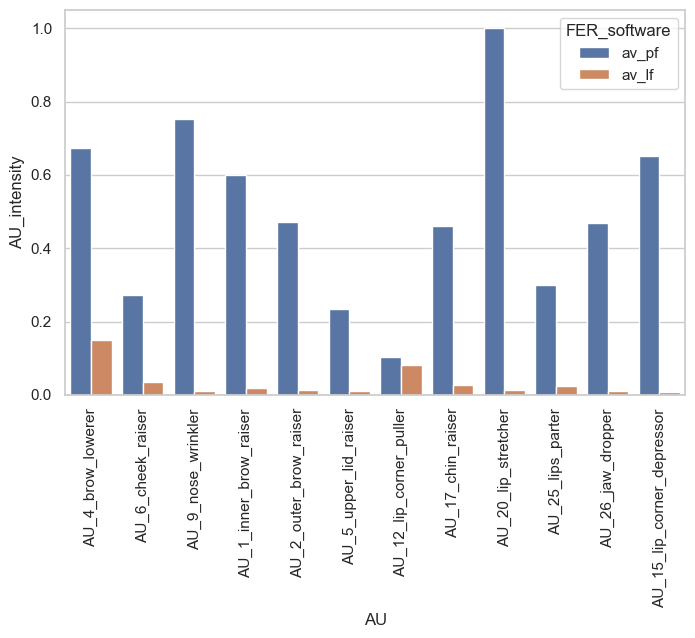

In [36]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='AU', y='AU_intensity', hue='FER_software', data=df_melted, ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.show()
